In [1]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt 
import seaborn as sns
import prophet
from prophet import Prophet 
from prophet.plot import plot_plotly, plot_components_plotly
from plotly import graph_objs as go

C:\Users\DELL LATITUDE E5270\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("./Sales-Export_2019-2020.csv")
df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160


In [3]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2020-02-12,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,2019-09-26,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,2019-07-11,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,2020-04-02,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,2019-12-22,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160


In [4]:
df.columns

Index(['country', 'order_value_EUR ', 'cost', 'date', 'category',
       'customer_name', 'sales_manager', 'sales_rep', 'device_type',
       'order_id'],
      dtype='object')

In [5]:
df.isna().sum()

country             0
order_value_EUR     0
cost                0
date                0
category            0
customer_name       0
sales_manager       0
sales_rep           0
device_type         0
order_id            0
dtype: int64

In [6]:
df.dropna(inplace= True)
df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2020-02-12,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,2019-09-26,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,2019-07-11,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,2020-04-02,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,2019-12-22,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160


In [7]:
df1 = df[["date", "cost"]]
df1.head()

,date,cost
0,2020-02-12,14122.61
1,2019-09-26,92807.78
2,2019-07-11,257480.34
3,2020-04-02,59752.32
4,2019-12-22,146621.76


In [8]:
df1.columns = ["ds", "y"]
df1.head()

,ds,y
0,2020-02-12,14122.61
1,2019-09-26,92807.78
2,2019-07-11,257480.34
3,2020-04-02,59752.32
4,2019-12-22,146621.76


In [9]:
df1.sort_values(by='ds', ascending=True, inplace = True)
df1 = df1.reset_index(drop=True)
df1.head()

C:\Users\DELL LATITUDE E5270\AppData\Local\Temp\ipykernel_14944\2849198025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by='ds', ascending=True, inplace = True)


,ds,y
0,2019-01-02,106841.93
1,2019-01-02,151518.96
2,2019-01-02,59750.03
3,2019-01-02,151779.30
4,2019-01-05,149681.47


In [10]:
df1 = df1.groupby(df1["ds"])["y"].sum().to_frame(name="y").reset_index()
df1.head()

,ds,y
0,2019-01-02,469890.22
1,2019-01-05,262476.30
2,2019-01-07,88066.99
3,2019-01-08,28192.66
4,2019-01-09,23656.32


In [11]:
df1["ds"].min()

Timestamp('2019-01-02 00:00:00')

In [12]:
df1["ds"].max()

Timestamp('2020-12-30 00:00:00')

<Axes: xlabel='ds'>

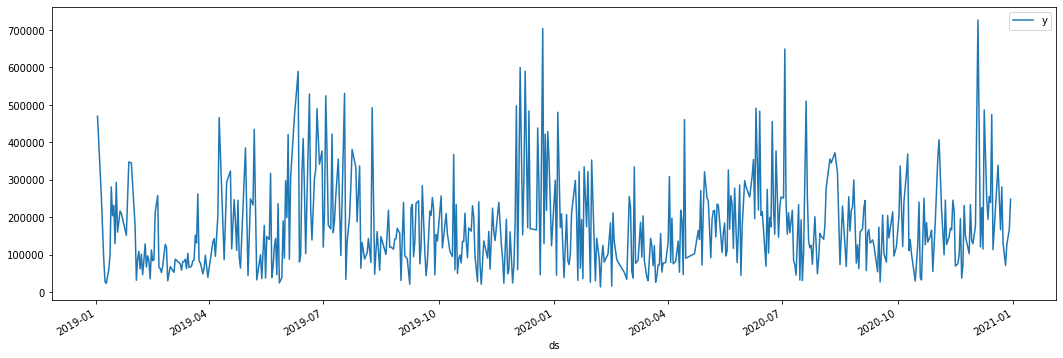

In [13]:
df1.plot(x = "ds", y = "y", figsize = (18, 6))

In [14]:
# Define the training date range
start_date = '2019-01-02'
end_date = '2019-12-30'
start_date1 = '2020-01-01'
end_date1 = '2020-12-30'

# Filter the DataFrame to select only the training and testing data
train = df1[(df1['ds'] >= start_date) & (df1['ds'] <= end_date)]
test = df1[(df1['ds'] >= start_date1) & (df1['ds'] <= end_date1)]

In [15]:
df1.shape

(536, 2)

In [16]:
train.shape

(267, 2)

In [17]:
test.shape

(269, 2)

In [18]:
# this code sets up and trains a Prophet model (m) on historical time series data (train), 
# generates a DataFrame (future) for future timestamps, 
# and then uses the trained model to make forecasts for those future timestamps
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods = 365) #MS - Monthly, H - Hourly
forecast = m.predict(future) 

00:19:11 - cmdstanpy - INFO - Chain [1] start processing
00:19:11 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,140766.622338,-36169.661275,307361.548214,140766.622338,140766.622338,-2164.858776,-2164.858776,-2164.858776,-2164.858776,-2164.858776,-2164.858776,0.0,0.0,0.0,138601.763562
1,2019-01-05,141344.577812,-35479.353240,281390.268997,141344.577812,141344.577812,-13025.679433,-13025.679433,-13025.679433,-13025.679433,-13025.679433,-13025.679433,0.0,0.0,0.0,128318.898379
2,2019-01-07,141729.881462,-13948.478955,301823.458028,141729.881462,141729.881462,6206.426059,6206.426059,6206.426059,6206.426059,6206.426059,6206.426059,0.0,0.0,0.0,147936.307521
3,2019-01-08,141922.533287,5394.331923,321143.009483,141922.533287,141922.533287,18404.694038,18404.694038,18404.694038,18404.694038,18404.694038,18404.694038,0.0,0.0,0.0,160327.227325
4,2019-01-09,142115.185112,-22469.259360,294959.495847,142115.185112,142115.185112,-2164.858776,-2164.858776,-2164.858776,-2164.858776,-2164.858776,-2164.858776,0.0,0.0,0.0,139950.326336


In [20]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
627,2020-12-25,279803.895686,95864.506522,407329.388311,279771.007636,279839.142344,-24960.039316,-24960.039316,-24960.039316,-24960.039316,-24960.039316,-24960.039316,0.0,0.0,0.0,254843.856370
628,2020-12-26,279996.098954,101242.441110,428463.806327,279963.115649,280031.464550,-13025.679433,-13025.679433,-13025.679433,-13025.679433,-13025.679433,-13025.679433,0.0,0.0,0.0,266970.419521
629,2020-12-27,280188.302223,133555.112455,446877.265727,280155.223827,280223.838036,710.490898,710.490898,710.490898,710.490898,710.490898,710.490898,0.0,0.0,0.0,280898.793120
630,2020-12-28,280380.505491,116475.038877,439415.957169,280347.285341,280416.291086,6206.426059,6206.426059,6206.426059,6206.426059,6206.426059,6206.426059,0.0,0.0,0.0,286586.931550
631,2020-12-29,280572.708759,143643.031762,469703.240959,280539.329945,280608.744136,18404.694038,18404.694038,18404.694038,18404.694038,18404.694038,18404.694038,0.0,0.0,0.0,298977.402798


In [21]:
test.tail()

,ds,y
531,2020-12-24,131541.23
532,2020-12-26,71885.02
533,2020-12-27,127165.61
534,2020-12-29,167821.39
535,2020-12-30,248617.53


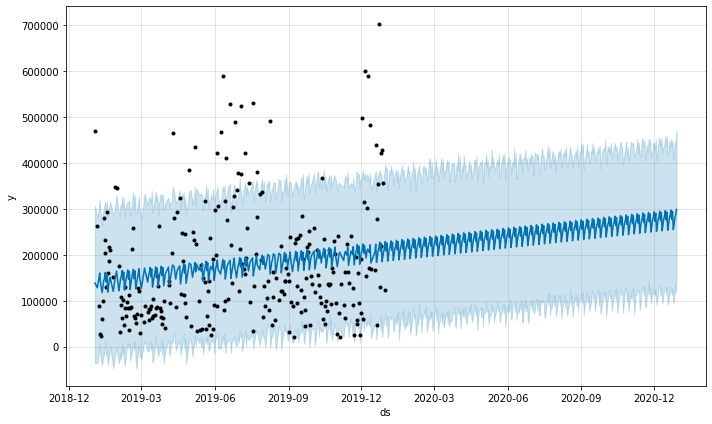

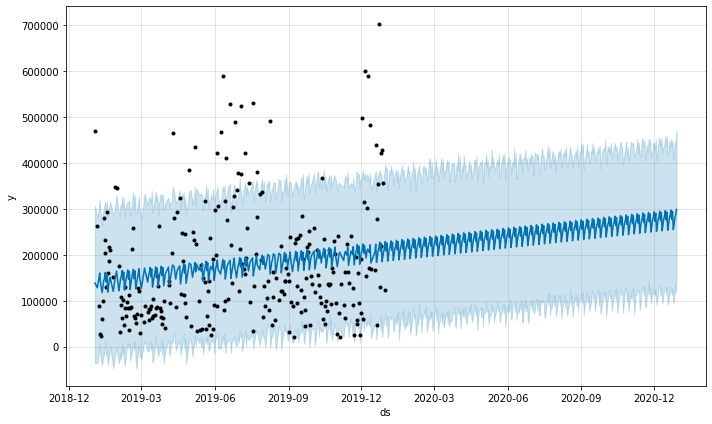

In [22]:
# plotting the forecasted data
m.plot(forecast)

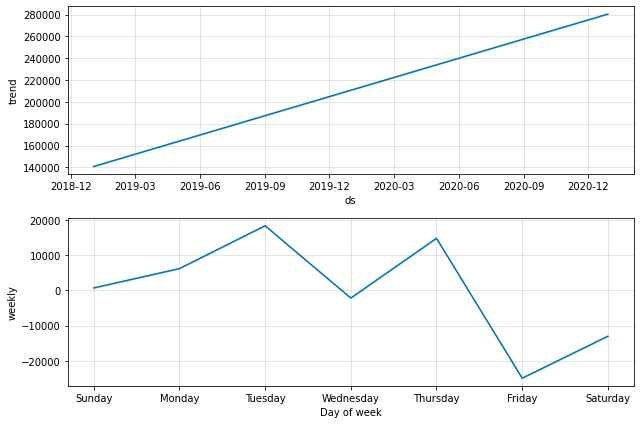

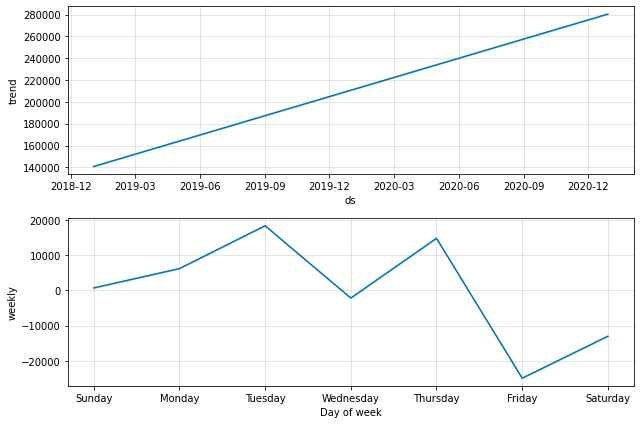

In [23]:
# this code is used to create a set of visualizations that display the individual components of the time series forecast
m.plot_components(forecast)

In [24]:
# from prophet.plot import plot_plotly
# import plotly.offline as py

# fig = plot_plotly(m, forecast)
# py.iplot(fig)

In [25]:
# import nbformat
# print(nbformat.__version__)

In [26]:
# performs cross-validation using the Prophet library for time series forecasting
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = "90 days")
df_cv 

  0%|          | 0/1 [00:00<?, ?it/s]

00:19:15 - cmdstanpy - INFO - Chain [1] start processing
00:19:15 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-10-03,195369.764747,35778.565537,352405.491639,257325.39,2019-10-01
1,2019-10-04,175032.319456,12592.586181,318406.986176,118408.99,2019-10-01
2,2019-10-07,182889.703274,25557.636035,345710.580444,210091.13,2019-10-01
3,2019-10-08,224222.698451,71107.708596,372849.313926,155091.85,2019-10-01
4,2019-10-09,197593.471300,47663.462059,357096.104728,133195.66,2019-10-01
...,...,...,...,...,...,...
64,2019-12-25,205519.578081,60591.071976,357197.935382,421891.31,2019-10-01
65,2019-12-26,204016.426690,43400.756728,350552.166693,218216.55,2019-10-01
66,2019-12-27,183678.981398,34008.363115,340696.965799,428814.58,2019-10-01
67,2019-12-28,200189.221430,53660.951502,346647.250716,356887.11,2019-10-01


In [27]:
# compute performance metrics based on the results of cross-validation
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p 

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,4.057837e+09,63701.154716,61115.781849,0.430258,0.461971,0.354225,1.000000
1,11 days,4.986006e+09,70611.656442,66955.233415,0.559809,0.480842,0.421047,1.000000
2,12 days,9.923469e+09,99616.611532,87716.880952,0.562261,0.488200,0.465748,0.833333
3,13 days,1.234074e+10,111088.877610,103760.761237,0.882810,0.648399,0.611512,0.833333
4,14 days,1.155895e+10,107512.551762,93805.394226,0.815204,0.648399,0.557583,0.833333
...,...,...,...,...,...,...,...,...
59,85 days,6.299519e+10,250988.426708,206323.220031,1.016612,0.620841,0.772604,0.500000
60,86 days,6.155462e+10,248102.040824,193015.219955,0.970872,0.620841,0.715658,0.500000
61,87 days,6.767423e+10,260142.705502,208390.313678,0.519157,0.542260,0.641949,0.333333
62,88 days,6.751358e+10,259833.760777,207882.656263,0.516987,0.542260,0.638358,0.333333


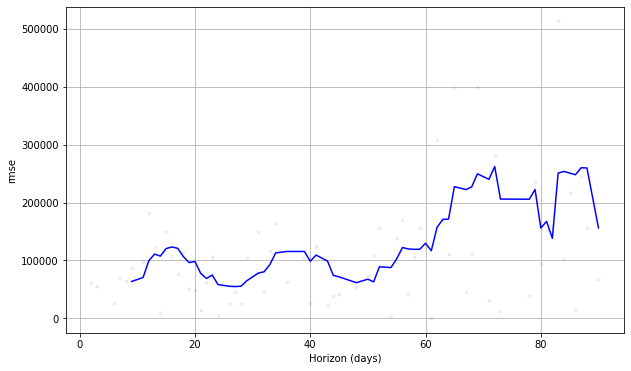

In [28]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Root Mean Squared Error (RMSE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "rmse")

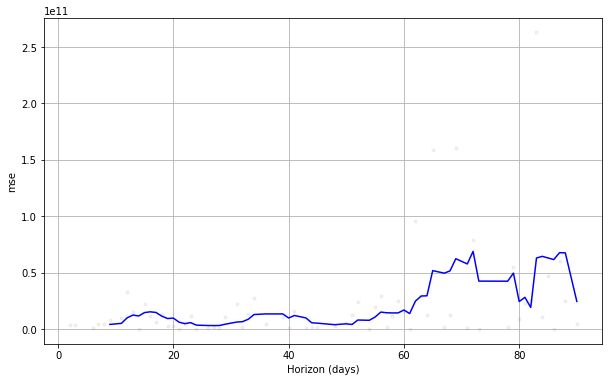

In [29]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Mean Squared Error (MSE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "mse")

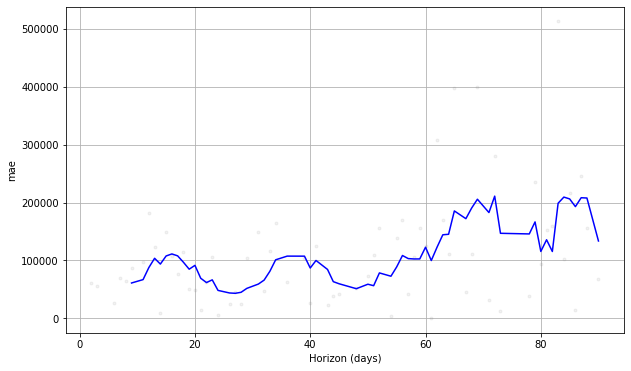

In [30]:
#  create a plot that visualizes a specific cross-validation metric, in this case, the Mean Absolute Error (MAE)
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric= "mae")